# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [6]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

1) Is the distribution of the body temperature normal?


# Graphical Methods
Histogram - An informal approach to testing normality is to compare a histogram of the sample data to a normal probability curve. The empirical distribution of the data (the histogram) should be bell-shaped and resemble the normal distribution. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


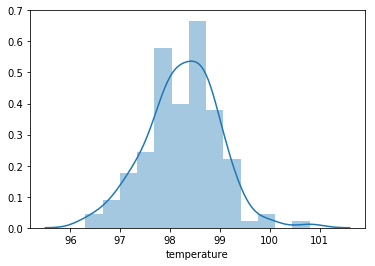

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# _ = plt.hist(df["temperature"])
# _ = plt.xlabel('Temperature')
# _ = plt.ylabel('Count')
#plt.show()
_ = sns.distplot(df['temperature'])

Box Plot

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution (though Tukey's boxplot assumes symmetry for the whiskers and normality for their length). The spacings between the different parts of the box indicate the degree of dispersion (spread) and skewness in the data, and show outliers.

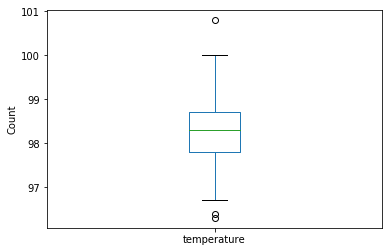

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
_ = df.plot(y='temperature', kind='box')
_ = plt.ylabel('Count')
plt.show()

QQ Plot 
If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x. If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but not necessarily on the line y = x. Q–Q plots can also be used as a graphical means of estimating parameters in a location-scale family of distributions.

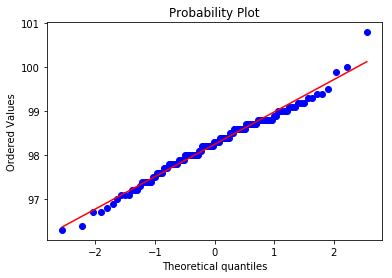

In [17]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df['temperature']  
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

Reviewing the histogram with the distribution curve, the box plot and the Q-Q plot, I would say that the temperature values in the data set do represent a normal distrubution. 

Is the sample size large? Are the observations independent?

In [27]:
df.groupby('gender').count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


Is the same size large? Since we have more than 30 measurements, I would consider the sameple size large.

The estimator of a proportion is p=X/n, where X is the number of 'positive' observations. When the observations are independent, this estimator has a (scaled) binomial distribution (and is also the sample mean of data from a Bernoulli distribution). The maximum variance of this distribution is 0.25/n, which occurs when the true parameter is p = 0.5. In practice, since p is unknown, the maximum variance is often used for sample size assessments.

For sufficiently large n, the distribution of p will be closely approximated by a normal distribution.  Using this approximation, it can be shown that around 95% of this distribution's probability lies within 2 standard deviations of the mean. Using the Wald method for the binomial distribution, an interval of the form

p-1.96*SQRT(0.25/n),p+1.96*SQRT(0.25/n)  

will form a 95% confidence interval for the true proportion. If this interval needs to be no more than W units wide, the equation

4*SQRT(0.25/n)=W
can be solved for n, yielding
n = 4/W2 = 1/B2 where B is the error bound on the estimate

i.e., the estimate is usually given as within ± B. So, for B = 10% one requires n = 100, for B = 5% one needs n = 400, for B = 3% the requirement approximates to n = 1000, while for B = 1% a sample size of n = 10000 is required.

So for this sample size of 130, we can estimate error at +/- 10%

I do not think the measurements between the men and women affect each other, so I would say the observations are independent.

3) Is the true population mean really 98.6 degrees F?

In [ ]:
First, try a bootstrap hypothesis test.

SEM:  0.06405661469519336
std of bootstrap replicates:  0.06345169095139801
Confidence interval:  [98.12384615 98.37463462]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


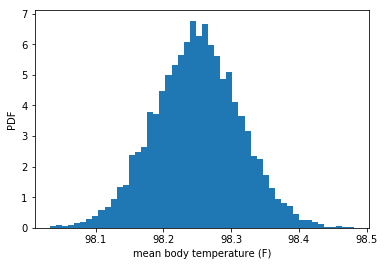

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
    
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

measurements = df['temperature'] 

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(measurements,np.mean,10000)

# Compute and print standard error of the mean (SEM)
sem = np.std(measurements) / np.sqrt(len(measurements))
print('SEM: ',sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('std of bootstrap replicates: ',bs_std)

# Confidence Interval
# Use your bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile 
# of your bootstrap replicates stored as bs_replicates. 
print('Confidence interval: ',np.percentile(bs_replicates,[2.5,97.5]))

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean body temperature (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

I would use the one sample test because all of the measurements are independent of each other.


      F_true = 98.6
      F_est  = 98 +/- 1 (based on 130 measurements)
      


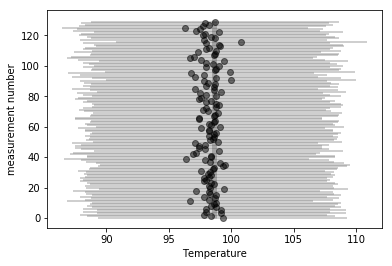

In [9]:
# I found this code from here http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/ 
# that discusses frequentism bv Bayesianism
# This is the frequentism approach
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
np.random.seed(42)  # for repeatability

F_true = 98.6  # true tempersture
N = 130 # number of measurements
F = df["temperature"]  # N measurements 
e = np.sqrt(F)  # errors on Poisson counts estimated via square root

fig, ax = plt.subplots()
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.vlines([F_true], 0, N, linewidth=5, alpha=0.2)
ax.set_xlabel("Temperature");
ax.set_ylabel("measurement number");

w = 1. / e ** 2
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, (w * F).sum() / w.sum(), w.sum() ** -0.5, N))


In this situation, is it appropriate to use the  t  or  z  statistic?

Because we have over 30 data points, we should use the z test.  For 30 or less data points, we can use the t test.

Definition of T-test
A t-test is a hypothesis test used by the researcher to compare population means for a variable, classified into two categories depending on the less-than interval variable. More precisely, a t-test is used to examine how the means taken from two independent samples differ.

T-test follows t-distribution, which is appropriate when the sample size is small, and the population standard deviation is not known. The shape of a t-distribution is highly affected by the degree of freedom. The degree of freedom implies the number of independent observations in a given set of observations.

Assumptions of T-test:

All data points are independent.
The sample size is small. Generally, a sample size exceeding 30 sample units is regarded as large, otherwise small but that should not be less than 5, to apply t-test.
Sample values are to be taken and recorded accurately.
The test statistic is:
        
            t-test = (x-u)/(s/sqrt(n))
t-test
x ̅is the sample mean
s is sample standard deviation
n is sample size
μ is the population mean

Definition of Z-test
Z-test refers to a univariate statistical analysis used to test the hypothesis that proportions from two independent samples differ greatly. It determines to what extent a data point is away from its mean of the data set, in standard deviation.

The researcher adopts z-test, when the population variance is known, in essence, when there is a large sample size, sample variance is deemed to be approximately equal to the population variance. In this way, it is assumed to be known, despite the fact that only sample data is available and so normal test can be applied.

Assumptions of Z-test:

All sample observations are independent
Sample size should be more than 30.
Distribution of Z is normal, with a mean zero and variance 1.
The test statistic is:

    z_test = (x-u)/(s/sqrt(n))

z-test
x ̅is the sample mean
s is population standard deviation
n is sample size
μ is the population mean

In [17]:
#z test
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math

df = pd.read_csv('data/human_body_temperature.csv')

pop = df["temperature"].sample(n=65)
sample = df["temperature"].sample(n=65)
x = np.mean(sample)
std = np.std(pop)
n = len(sample)
u = np.mean(pop)

ztest = (x-u)/(std/math.sqrt(n))

print('z-test: ',ztest)


z-test:  0.824254911088741


Now try using the other test. How is the result be different? Why?

In [23]:
# t-test for independent samples
import math 
import numpy as np
from scipy import stats
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = stats.sem(data1), stats.sem(data2)
    # standard error on the difference between the samples
    sed = math.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p
 
# seed the random number generator
np.random.seed(42)
# generate two independent samples
df = pd.read_csv('data/human_body_temperature.csv')
data1 = df["temperature"].sample(n=65)
data2 = df["temperature"].sample(n=65)
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


t=-0.618, df=128, cv=1.657, p=0.538
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [24]:
#z test
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math

df = pd.read_csv('data/human_body_temperature.csv')

pop = df["temperature"].sample(n=10)
sample = df["temperature"].sample(n=10)
x = np.mean(sample)
std = np.std(pop)
n = len(sample)
u = np.mean(pop)

ztest = (x-u)/(std/math.sqrt(n))

print('z-test: ',ztest)
# t-test for independent samples
import numpy as np
from scipy import stats
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = stats.sem(data1), stats.sem(data2)
    # standard error on the difference between the samples
    sed = math.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p
 
# seed the random number generator
np.random.seed(42)
# generate two independent samples
df = pd.read_csv('data/human_body_temperature.csv')
data1 = df["temperature"].sample(n=10)
data2 = df["temperature"].sample(n=10)
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

z-test:  0.8054761267708417
t=-1.272, df=18, cv=1.734, p=0.220
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


At what temperature should we consider someone's temperature to be "abnormal"?

I would say anyones temperature outside of the 95th percentile would be considered "abnormal".

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, 
keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [25]:
# Get bootstrap replicates of means
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math

df = pd.read_csv('data/human_body_temperature.csv')

measurements = df['temperature'] 

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(measurements,np.mean,10000)

# Compute and print standard error of the mean (SEM)
sem = np.std(measurements) / np.sqrt(len(measurements))
print('SEM: ',sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('std of bootstrap replicates: ',bs_std)

# Confidence Interval
# Use your bootstrap replicates you just generated to compute the 95% confidence interval. That is,
# give the 2.5th and 97.5th percentile of your bootstrap replicates 
print('Confidence interval: ',np.percentile(bs_replicates,[2.5,97.5]))





SEM:  0.06405661469519336
std of bootstrap replicates:  0.06374921823416714
Confidence interval:  [98.12459615 98.37538462]


Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [35]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math

df = pd.read_csv('data/human_body_temperature.csv')
std=np.std(df["temperature"])
print("std of data set:",std)
males=df[df["gender"]=='M']
females=df[df["gender"]=='F']
mm=np.mean(males["temperature"])
fm=np.mean(females["temperature"])
print("male mean ",mm," female mean: ",fm, " mean diff: ", mm-fm)
print("3 sigma: ", s*std)


std of data set: 0.7303577789050377
male mean  98.1046153846154  female mean:  98.39384615384613  mean diff:  -0.289230769230727
3 sigma:  0.5346845093077108


The difference between the male mean temperature and the female mean temperature falls within 3 sigma so I would conclude there is no difference between the male and female normal temperatures.